In [ ]:
Lets use this cosmology dataset for stars ( temparature, radius, colour, etc.) to cerate an anomaly detection model.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("cleaned_star_data.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [6]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
(240, 7)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [8]:
selected_features = ["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]
correlation_matrix = df[selected_features].corr()

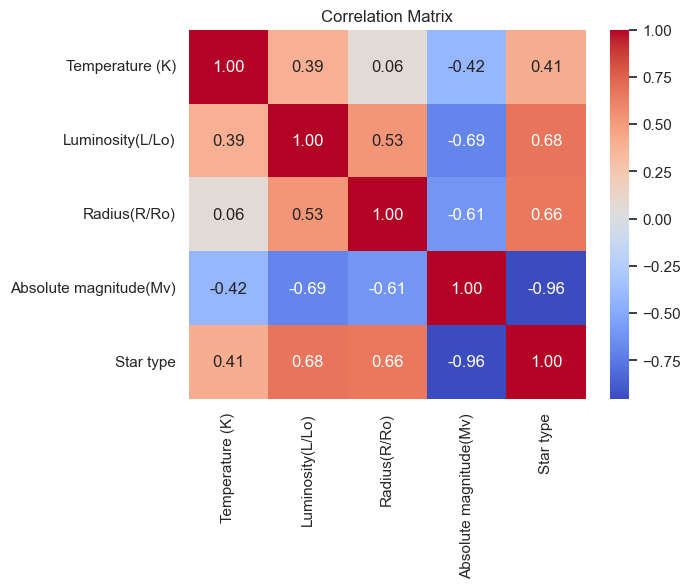

In [9]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

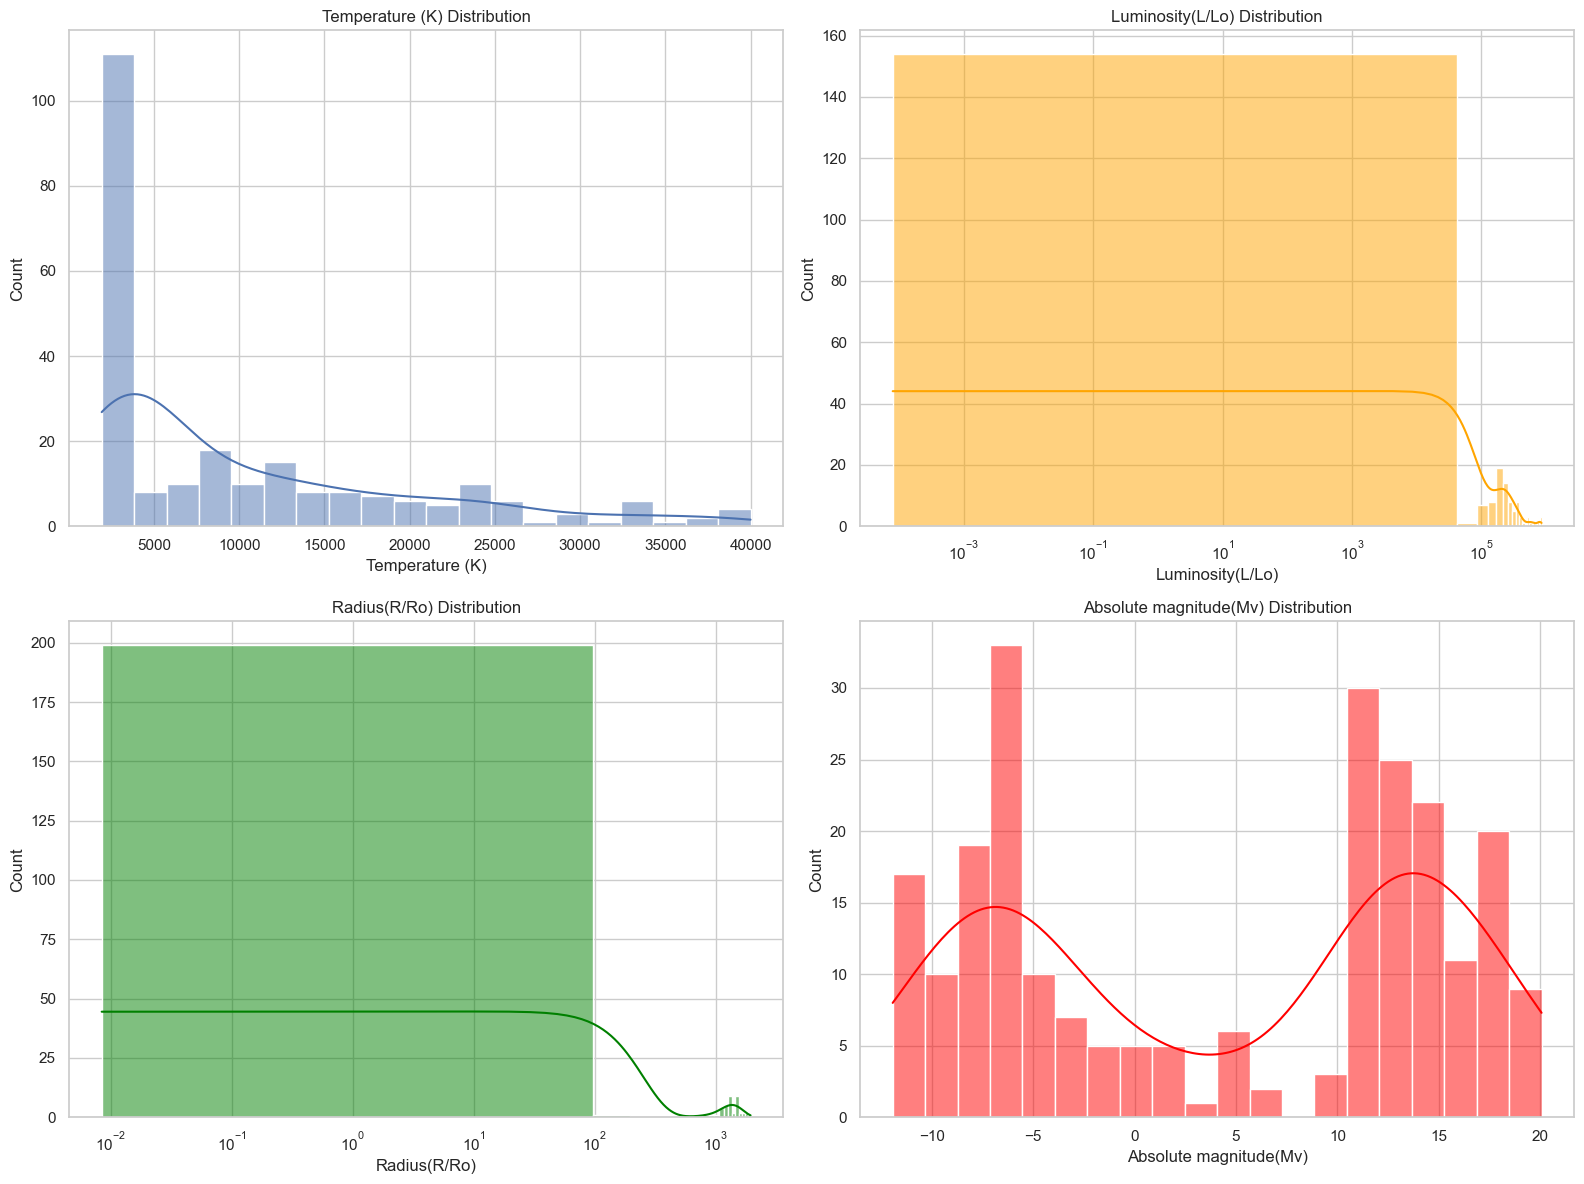

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Temperature (K)
sns.histplot(df['Temperature (K)'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Temperature (K) Distribution')

# Histogram for Luminosity(L/Lo)
sns.histplot(df['Luminosity(L/Lo)'], bins=20, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Luminosity(L/Lo) Distribution')
axes[0, 1].set_xscale('log') # Setting logarithmic scale due to wide range

# Histogram for Radius(R/Ro)
sns.histplot(df['Radius(R/Ro)'], bins=20, kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Radius(R/Ro) Distribution')
axes[1, 0].set_xscale('log') # Setting logarithmic scale due to wide range

# Histogram for Absolute magnitude(Mv)
sns.histplot(df['Absolute magnitude(Mv)'], bins=20, kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Absolute magnitude(Mv) Distribution')

plt.tight_layout()
plt.show()

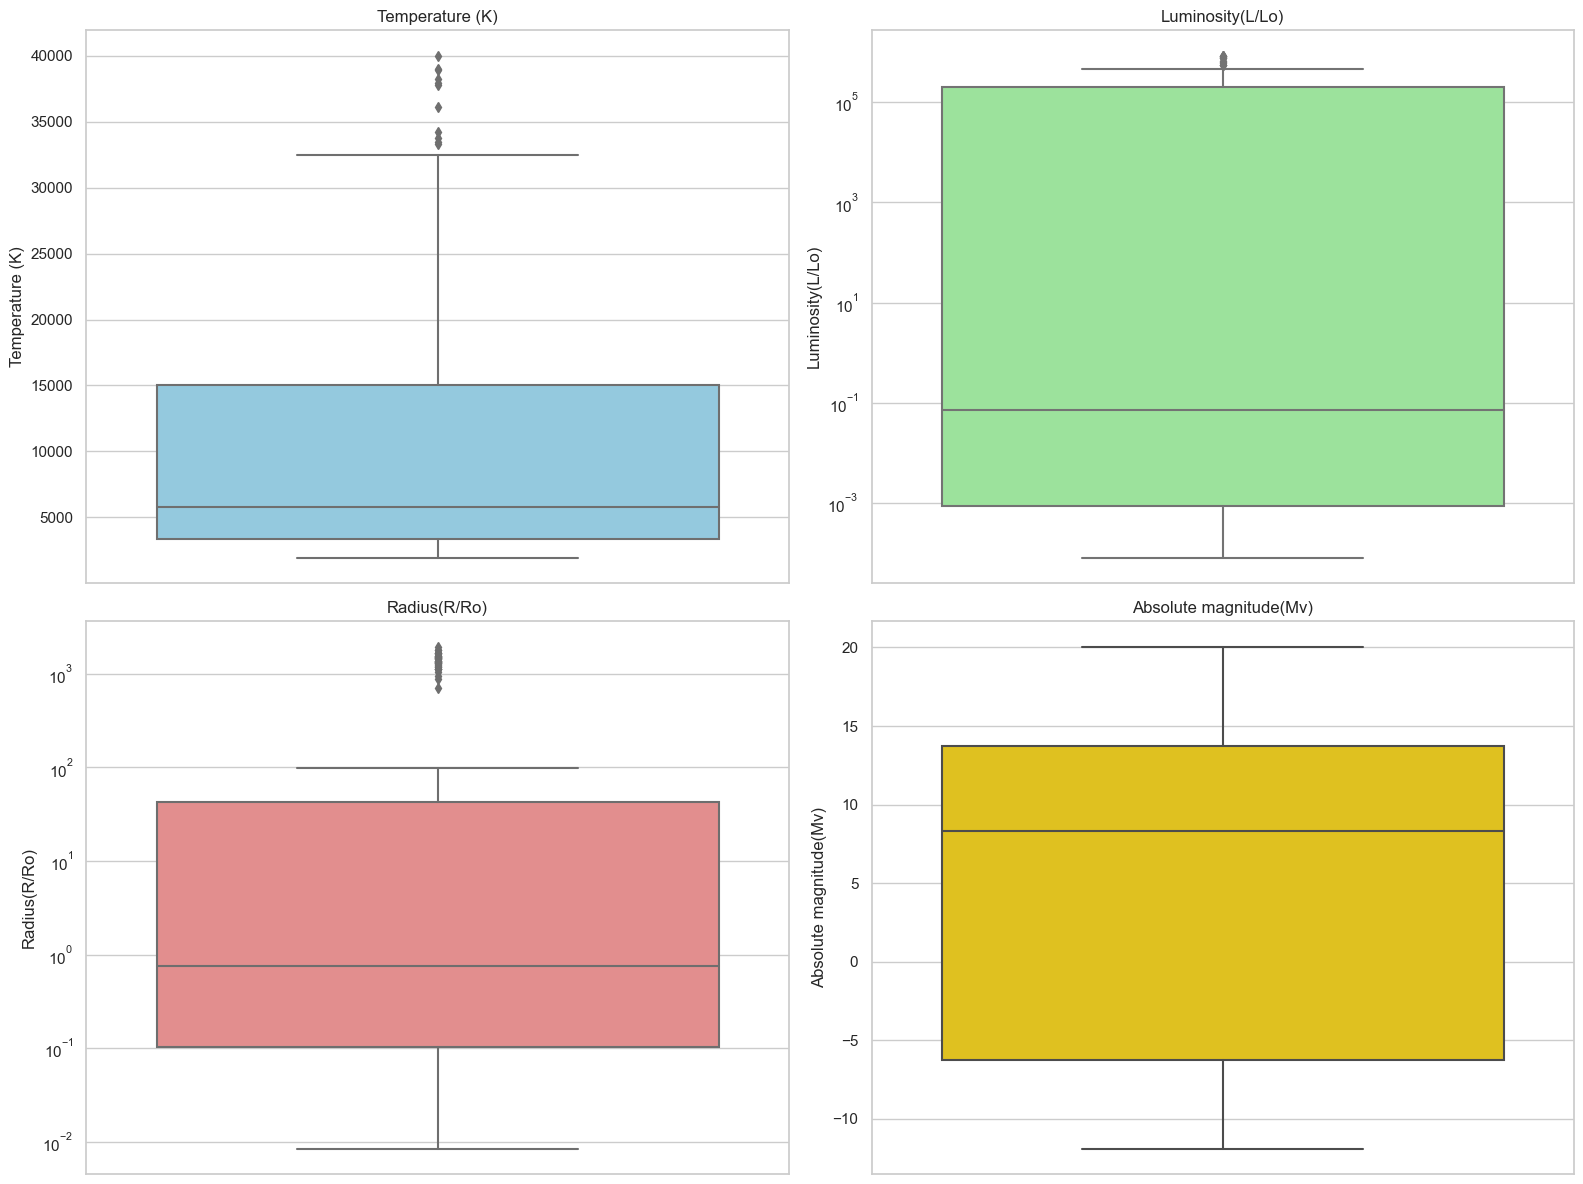

In [12]:
# Define the figure and subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
data = df
# Box plot for Temperature (K)
sns.boxplot(data=data, y='Temperature (K)', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Temperature (K)')

# Box plot for Luminosity(L/Lo)
sns.boxplot(data=data, y='Luminosity(L/Lo)', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Luminosity(L/Lo)')
axes[0, 1].set_yscale('log') # Setting logarithmic scale due to wide range

# Box plot for Radius(R/Ro)
sns.boxplot(data=data, y='Radius(R/Ro)', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Radius(R/Ro)')
axes[1, 0].set_yscale('log') # Setting logarithmic scale due to wide range

# Box plot for Absolute magnitude(Mv)
sns.boxplot(data=data, y='Absolute magnitude(Mv)', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Absolute magnitude(Mv)')

plt.tight_layout()
plt.show()

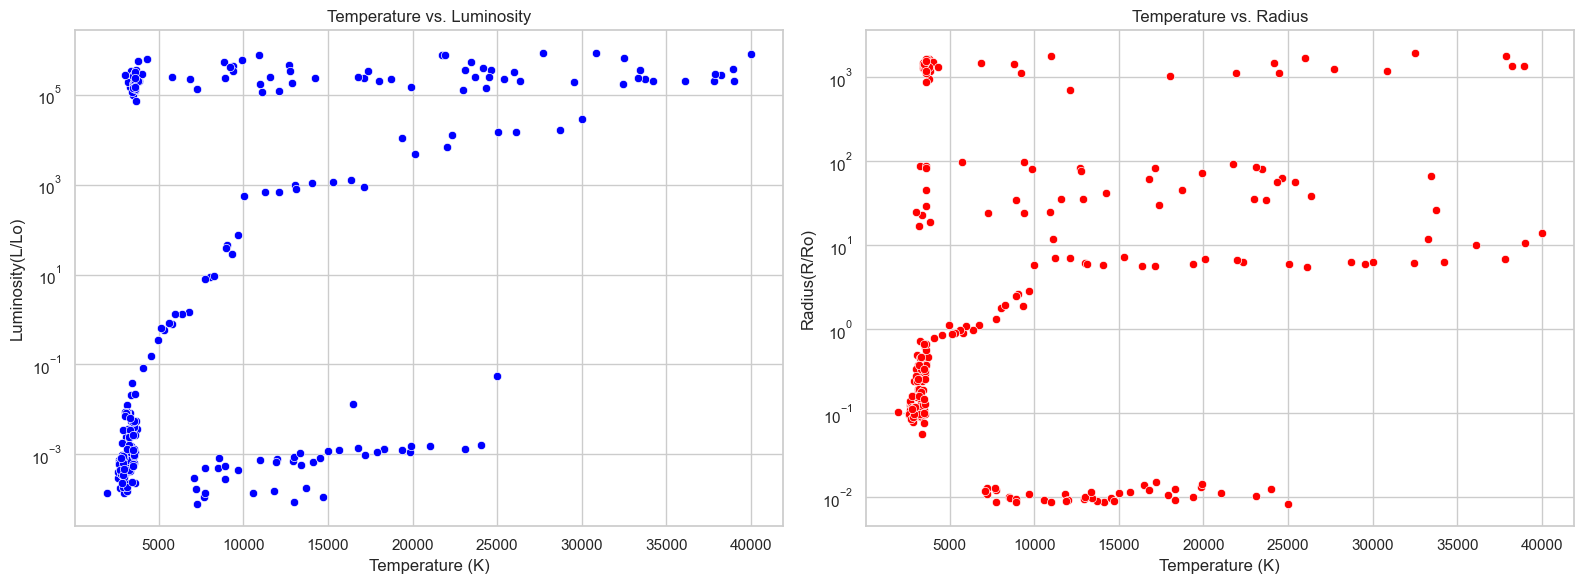

In [14]:
# Define the figure and subplots for scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Temperature vs. Luminosity
sns.scatterplot(data=data, x='Temperature (K)', y='Luminosity(L/Lo)', ax=axes[0], color='blue')
axes[0].set_title('Temperature vs. Luminosity')
axes[0].set_yscale('log') # Log scale for Luminosity due to wide range

# Scatter plot for Temperature vs. Radius
sns.scatterplot(data=data, x='Temperature (K)', y='Radius(R/Ro)', ax=axes[1], color='red')
axes[1].set_title('Temperature vs. Radius')
axes[1].set_yscale('log') # Log scale for Radius due to wide range

plt.tight_layout()
plt.show()

In [ ]:
some combinations of features that look interesting is  star type and radius/luminosity

we could use this data to predict the color of the stars 

In [ ]:
#lets go with an anolomy detection mode. such a model can find out new kinds of celestrial objects based on temperature, color, etc.  

In [16]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Select numerical features for anomaly detection
numerical_features = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Fit the model and predict anomalies (1 for normal, -1 for anomaly)
lof_anomalies = lof.fit_predict(scaled_features)

# Add the LOF anomaly predictions to the original dataframe
data['LOF_Anomaly'] = lof_anomalies

# Count of normal vs. anomaly based on LOF
lof_anomaly_counts = data['LOF_Anomaly'].value_counts()

lof_anomaly_counts
# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')

# Fit the model and predict anomalies (1 for normal, -1 for anomaly)
lof_anomalies = lof.fit_predict(scaled_features)

# Add the LOF anomaly predictions to the original dataframe
data['LOF_Anomaly'] = lof_anomalies

# Count of normal vs. anomaly based on LOF
lof_anomaly_counts = data['LOF_Anomaly'].value_counts()


lof_anomaly_counts

LOF_Anomaly
 1    202
-1     38
Name: count, dtype: int64

In [2]:
# Lets explore the use of a LOF model as well - This algorithm measures the local deviation of a given data point with respect to its neighbors, aiming to identify areas of similar density and points that are outliers in their local contexts

In [ ]:
# Lets try an isolation forest method and look and compare the outcomes


In [23]:
# Extract anomalies and normal data points based on LOF predictions
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model and predict anomalies (1 for normal, -1 for anomaly)
iso_forest_anomalies = iso_forest.fit_predict(scaled_features)

# Add the Isolation Forest anomaly predictions to the original dataframe
data['Anomaly_IF'] = iso_forest_anomalies
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model and predict anomalies (1 for normal, -1 for anomaly)
iso_forest_anomalies = iso_forest.fit_predict(scaled_features)

# Add the Isolation Forest anomaly predictions to the original dataframe
data['Anomaly'] = iso_forest_anomalies
lof_anomalies_data = data[data['LOF_Anomaly'] == -1]
lof_normal_data = data[data['LOF_Anomaly'] == 1]

# Analyze average values of key features for LOF anomalies vs overall dataset
lof_anomalies_avg = lof_anomalies_data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].mean()
overall_avg = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].mean()

# Comparison with Isolation Forest anomalies
iso_forest_anomalies_data = data[data['Anomaly'] == -1]
common_anomalies = lof_anomalies_data.index.intersection(iso_forest_anomalies_data.index).size

lof_anomalies_avg, overall_avg, common_anomalies

(Temperature (K)            12891.394737
 Luminosity(L/Lo)          173731.381828
 Radius(R/Ro)                 401.987558
 Absolute magnitude(Mv)         5.753526
 dtype: float64,
 Temperature (K)            10497.462500
 Luminosity(L/Lo)          107188.361635
 Radius(R/Ro)                 237.157781
 Absolute magnitude(Mv)         4.382396
 dtype: float64,
 14)

In [ ]:
# This shows that both models agree on 14 of the anomalies.

In [ ]:
# lets look at some model metrics for the 2 unsupervised learning models. Silhoutte scores are helpful to understand these kinds of models. 

In [20]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for Isolation Forest and LOF models
# Note: Silhouette score expects all samples to belong to a cluster, hence it might not be directly applicable in a traditional sense to anomaly detection
# We will use the anomaly labels as "clusters" for the purpose of this demonstration

# For Isolation Forest
silhouette_iso = silhouette_score(scaled_features, data['Anomaly'])

# For LOF
silhouette_lof = silhouette_score(scaled_features, data['LOF_Anomaly'])

silhouette_iso, silhouette_lof

(0.4564553845578292, 0.14671093515624603)

In [ ]:
The silhoutte scores  shows that the Isolation forest model seems to identify distinct objects ( stars) in the data set vs the LOF model

In [ ]:
 # The LOF model shows 38 anomalies within the dataset.
  #  while the  isolation forest shows 59  anaolomies  
  #  lets get a visual of what they are as there maybe some useful insights to gain. 

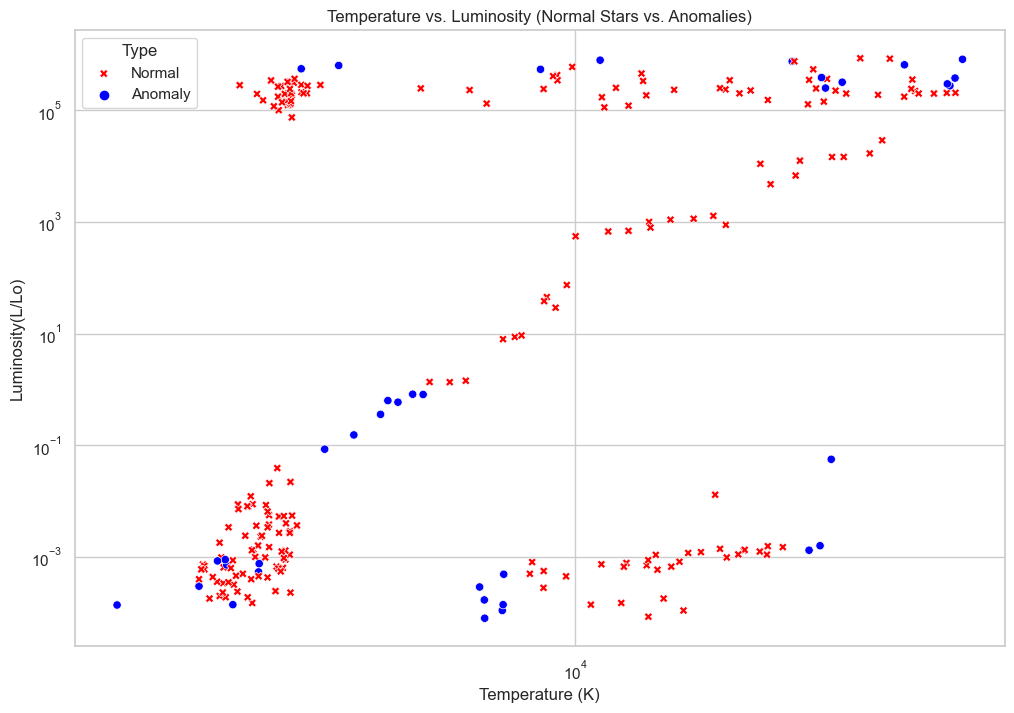

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Temperature vs. Luminosity for normal stars and anomalies
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Temperature (K)', y='Luminosity(L/Lo)', data=data, hue='LOF_Anomaly', palette=['blue', 'red'], style='LOF_Anomaly', markers=['o', 'X'])
plt.xscale('log')
plt.yscale('log')
plt.title('Temperature vs. Luminosity (Normal Stars vs. Anomalies)')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.legend(title='Type', labels=['Normal', 'Anomaly'])
plt.show()

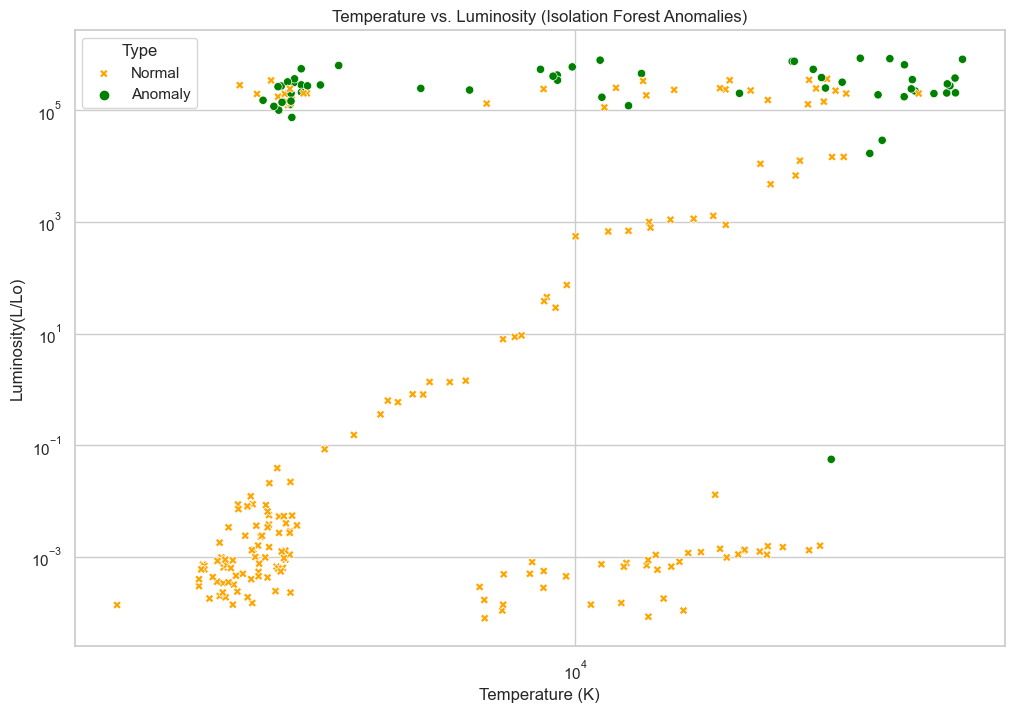

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Temperature (K)', y='Luminosity(L/Lo)', data=data, hue='Anomaly_IF', palette=['green', 'orange'], style='Anomaly_IF', markers=['o', 'X'])
plt.xscale('log')
plt.yscale('log')
plt.title('Temperature vs. Luminosity (Isolation Forest Anomalies)')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.legend(title='Type', labels=['Normal', 'Anomaly'])
plt.show()

KeyError: 'Anomaly_IF'

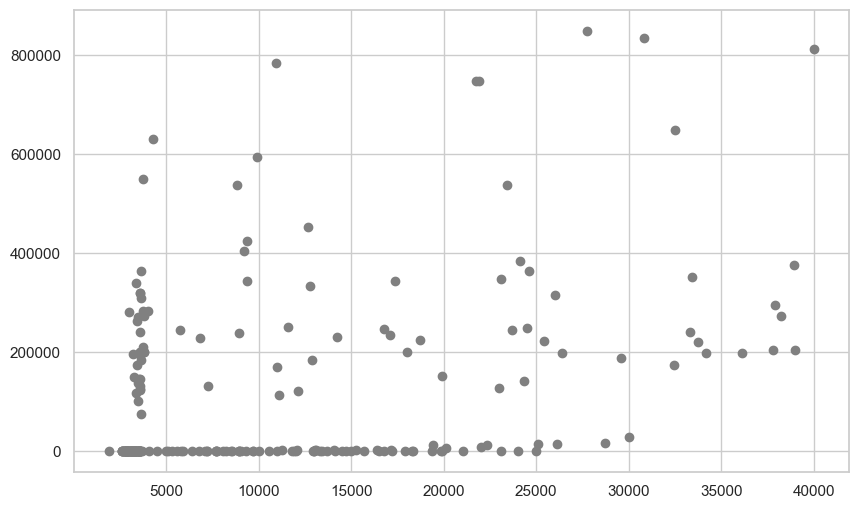

In [21]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature (K)'], data['Luminosity(L/Lo)'], c='grey', label='Normal Stars')

# Highlight anomalies detected by Isolation Forest
plt.scatter(data.loc[data['Anomaly_IF'] == -1, 'Temperature (K)'], data.loc[data['Anomaly_IF'] == -1, 'Luminosity(L/Lo)'], c='red', label='Isolation Forest Anomalies')

# Highlight anomalies detected by LOF
plt.scatter(data.loc[data['Anomaly_LOF'] == -1, 'Temperature (K)'], data.loc[data['Anomaly_LOF'] == -1, 'Luminosity(L/Lo)'], c='blue', label='LOF Anomalies')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Anomaly Detection: Isolation Forest vs. LOF')
plt.legend()
plt.show()